# Calculadora de Desvio Padrão da Média

In [1]:
import math

# função para calcular o desvio padrão da média
def calc_desvio_padrao(valores):
    n = len(valores)
    media = sum(valores) / n
    desvio = math.sqrt(sum([(x - media) ** 2 for x in valores]) / (n * (n - 1)))
    print("A média dos valores é:", media)
    return desvio

# pedir ao usuário para inserir os valores
valores = []
while True:
    valor = input("Digite um valor ou pressione Enter para encerrar: ")
    if valor == "":
        break
    valores.append(float(valor))

# calcular o desvio padrão e exibir o resultado
desvio_padrao = calc_desvio_padrao(valores)
print("O desvio padrão da média é:", desvio_padrao)

Digite um valor ou pressione Enter para encerrar: 23
Digite um valor ou pressione Enter para encerrar: 23
Digite um valor ou pressione Enter para encerrar: 
A média dos valores é: 23.0
O desvio padrão da média é: 0.0


# Calculadora de Propagação de Erro para Velocidade

In [6]:
import math

# função para calcular a velocidade média e a propagação de erros
def calc_velocidade_media(distancia, tempo, inc_distancia, inc_tempo):
    velocidade = distancia / tempo
    inc_velocidade = math.sqrt((inc_distancia / distancia)**2 + (inc_tempo / tempo)**2) * velocidade
    return velocidade, inc_velocidade

# pedir ao usuário para inserir os valores
distancia = float(input("Digite a distância percorrida: "))
tempo = float(input("Digite o tempo gasto: "))
inc_distancia = float(input("Digite a incerteza na medição da distância: "))
inc_tempo = float(input("Digite a incerteza na medição do tempo: "))

# calcular a velocidade média e a propagação de erros
velocidade_media, prop_erro_velocidade = calc_velocidade_media(distancia, tempo, inc_distancia, inc_tempo)

# exibir os resultados
print("A velocidade média é:", velocidade_media)
print("A propagação de erros na velocidade média é:", prop_erro_velocidade)

Digite a distância percorrida: 25.5
Digite o tempo gasto: 0.42
Digite a incerteza na medição da distância: 0.7
Digite a incerteza na medição do tempo: 0.08
A velocidade média é: 60.714285714285715
A propagação de erros na velocidade média é: 11.684106676855237


# Calculadora de Momento Linear

In [ ]:
# função para calcular o momento linear
def calc_momento_linear(massa, velocidade):
    return massa * velocidade

# pedir ao usuário para inserir os valores
massa = float(input("Digite a massa do objeto: "))
velocidade = float(input("Digite a velocidade do objeto: "))

# calcular o momento linear
momento_linear = calc_momento_linear(massa, velocidade)

# exibir o resultado
print("O momento linear é:", momento_linear)

# Calculadora de Propagação de Erros de Momento Linear

In [3]:
import math

# Solicita ao usuário que insira as variáveis e suas incertezas
massa = float(input("Insira a massa (kg): "))
delta_massa = float(input("Insira a incerteza da massa (kg): "))
velocidade = float(input("Insira a velocidade (m/s): "))
delta_velocidade = float(input("Insira a incerteza da velocidade (m/s): "))

# Cálculo do momento linear
momento = massa * velocidade

# Cálculo da incerteza do momento linear utilizando a propagação de erros
delta_momento = math.sqrt((delta_massa * velocidade)**2 + (massa * delta_velocidade)**2)

# Imprimindo o resultado
print("O momento linear é:", momento, "kg*m/s")
print("A incerteza do momento linear é:", delta_momento, "kg*m/s")

Insira a massa (kg): 0.0738
Insira a incerteza da massa (kg): 0.0001
Insira a velocidade (m/s): 4186
Insira a incerteza da velocidade (m/s): 1
O momento linear é: 308.9268 kg*m/s
A incerteza do momento linear é: 0.4250557610478889 kg*m/s


# Metodo de Mínimos Quadrados

Digite o número de pontos de dados: 10
Digite o valor de 1/Volume: 0.0028
Digite o valor da Pressão: 2.7
Digite o valor da barra de erro da Pressão: 0.2
Digite o valor de 1/Volume: 0.0028
Digite o valor da Pressão: 2.3
Digite o valor da barra de erro da Pressão: 0.2
Digite o valor de 1/Volume: 0.0029
Digite o valor da Pressão: 2.1
Digite o valor da barra de erro da Pressão: 0.2
Digite o valor de 1/Volume: 0.0029
Digite o valor da Pressão: 2
Digite o valor da barra de erro da Pressão: 0.2
Digite o valor de 1/Volume: 0.0029
Digite o valor da Pressão: 1.8
Digite o valor da barra de erro da Pressão: 0.2
Digite o valor de 1/Volume: 0.0030
Digite o valor da Pressão: 1.8
Digite o valor da barra de erro da Pressão: 0.2
Digite o valor de 1/Volume: 0.0030
Digite o valor da Pressão: 1.6
Digite o valor da barra de erro da Pressão: 0.2
Digite o valor de 1/Volume: 0.0030
Digite o valor da Pressão: 1.6
Digite o valor da barra de erro da Pressão: 0.2
Digite o valor de 1/Volume: 0.0030
Digite o valor d

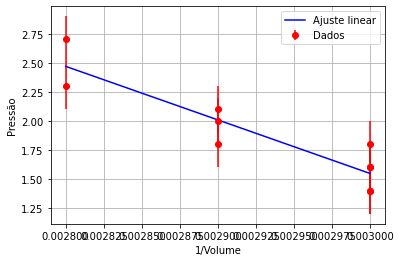

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Função para ajuste linear
def linear_fit(x, y):
    n = len(x)
    A = np.vstack([x, np.ones(n)]).T
    a, b = np.linalg.lstsq(A, y, rcond=None)[0]
    
    # Cálculo da matriz de covariância
    residuos = y - (a * x + b)
    sigma_quad = np.sum(residuos**2) / (n - 2)
    cov = sigma_quad * np.linalg.inv(np.dot(A.T, A))
    cov_a_b = cov.diagonal()
    
    # Cálculo das incertezas
    incerteza_a = np.sqrt(cov_a_b[0])
    incerteza_b = np.sqrt(cov_a_b[1])
    
    return a, b, incerteza_a, incerteza_b

# Input dos dados de pressão, volume e barras de erro
n = int(input("Digite o número de pontos de dados: "))
x = np.zeros(n)
y = np.zeros(n)
erro_y = np.zeros(n)

for i in range(n):
    x[i] = float(input("Digite o valor de 1/Volume: "))
    y[i] = float(input("Digite o valor da Pressão: "))
    erro_y[i] = float(input("Digite o valor da barra de erro da Pressão: "))

# Realiza o ajuste linear
a, b, incerteza_a, incerteza_b = linear_fit(x, y)

# Imprime os coeficientes a, b e suas incertezas
print("Coeficiente a:", a)
print("Incerteza do coeficiente a:", incerteza_a)
print("Coeficiente b:", b)
print("Incerteza do coeficiente b:", incerteza_b)

# Cria um array de valores para plotar a reta de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = a * x_fit + b

# Plota o gráfico com os pontos de dados, barras de erro e a reta de ajuste
plt.errorbar(x, y, yerr=erro_y, fmt='o', color='red', label='Dados')
plt.plot(x_fit, y_fit, color='blue', label='Ajuste linear')
plt.xlabel('1/Volume')
plt.ylabel('Pressão')
plt.legend()
plt.grid(True)
plt.show()
